# MOM-SIS 0.1$^\circ$ Diagnostics

This notebook calculates and retains key diagnostics from our mom01v5 simulations. The following experiments are included:

| Experiment Name | Size | Description |
|-----------------|------|-----------------|
|GFDL50 | 2.2T | Original simulation with 50 vertical levels. Ran from Levitus for about 60 years, but data output only saved from about year 40.|
|KDS75 | 17 T|Branched from GFDL50 at year 45 (re-zeroed), but with Kial Stewart's 75 level scheme. Has now run for 103 years. Years 90-100 have 5-daily output.|
| KDS75_wind | 1.1T| Short (5-year) Antarctic wind perturbation case, branched from KDS75 at year 40.|
| KDS75_PI | 5.1T | Paul Spence's Poleward Intensification wind experiment. Branched from KDS75 at year 70, will run until year 100 with 5-daily output for the last decade|
| KDS75_UP | 0.8T| Paul Spence's Increased winds case. Branched from KDS75 at year 70, will run until year 100 with 5-daily output for the last decade. (In Progress) |


In [3]:
%matplotlib inline

import os
from glob import glob
import numpy as np

from netCDF4 import Dataset

import dask
import xarray as xr

from dask.dot import dot_graph

from mpl_toolkits.basemap import Basemap, shiftgrid
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

In [4]:
DataDir = '/g/data3/hh5/tmp/cosima/mom01v5'

expts = ['GFDL50','KDS75','KDS75_UP','KDS75_PI','KDS75_wind']

## Wind Stress fields
The following code block shows the zonal- and time-averaged wind stress forcing for each experiment.

In [9]:
expt = 'KDS75_wind'
ExpDir = os.path.join(DataDir, expt)
FileList = sorted(glob(os.path.join(ExpDir, 'output*/ocean_month.nc')))

dsx = xr.open_dataset(FileList[0])

In [10]:
dsx

<xarray.Dataset>
Dimensions:                   (nv: 2, time: 3, xt_ocean: 3600, xu_ocean: 3600, yt_ocean: 2700, yu_ocean: 2700)
Coordinates:
  * xt_ocean                  (xt_ocean) float64 -279.9 -279.8 -279.7 -279.6 ...
  * yt_ocean                  (yt_ocean) float64 -81.11 -81.07 -81.02 -80.98 ...
  * time                      (time) object   41-01-16 12:00:00 ...
  * nv                        (nv) float64 1.0 2.0
  * xu_ocean                  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 ...
  * yu_ocean                  (yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 ...
    geolon_t                  (yt_ocean, xt_ocean) float64 nan nan nan nan ...
    geolat_t                  (yt_ocean, xt_ocean) float64 nan nan nan nan ...
    geolon_c                  (yu_ocean, xu_ocean) float64 nan nan nan nan ...
    geolat_c                  (yu_ocean, xu_ocean) float64 nan nan nan nan ...
Data variables:
    mld                       (time, yt_ocean, xt_ocean) float64 nan nan nan ...
    

In [8]:
import warnings
warnings.filterwarnings("ignore", message="Unable to decode time axis into full numpy.datetime64 objects")

In [7]:
dsx.tau_x

<xarray.DataArray 'tau_x' (time: 3, yu_ocean: 2700, xu_ocean: 3600)>
[29160000 values with dtype=float64]
Coordinates:
  * time      (time) object   41-01-16 12:00:00   41-02-15 00:00:00 ...
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 -279.5 -279.4 ...
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 -80.92 -80.88 ...
    geolon_c  (yu_ocean, xu_ocean) float64 nan nan nan nan nan nan nan nan ...
    geolat_c  (yu_ocean, xu_ocean) float64 nan nan nan nan nan nan nan nan ...
Attributes:
    long_name:      i-directed wind stress forcing u-velocity
    units:          N/m^2
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  surface_downward_x_stress

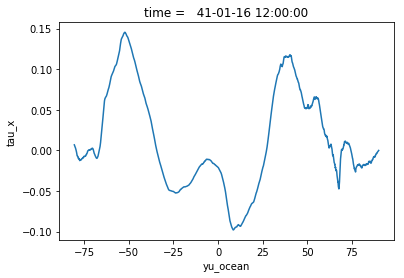

In [11]:
mean_tau_x = dsx.tau_x.isel(time=0).mean('xu_ocean')
mean_tau_x.plot()


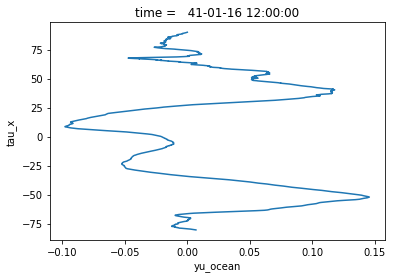

In [12]:
line, = mean_tau_x.plot.line()

xdata = line.get_xdata()
ydata = line.get_ydata()
xlim = plt.xlim()
ylim = plt.ylim()

line.set_xdata(ydata)
line.set_ydata(xdata)
plt.xlim(ylim)
plt.ylim(xlim)

#swap axes labels too!
plt.draw()


## Average Wind Stress

In [13]:
%%time
dsx = xr.open_mfdataset(FileList[-4:])

CPU times: user 13.9 s, sys: 2.67 s, total: 16.6 s
Wall time: 16 s


In [14]:
FileList[-4:]

['/g/data3/hh5/tmp/cosima/mom01v5/KDS75_wind/output166/ocean_month.nc',
 '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_wind/output167/ocean_month.nc',
 '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_wind/output168/ocean_month.nc',
 '/g/data3/hh5/tmp/cosima/mom01v5/KDS75_wind/output169/ocean_month.nc']

In [15]:
%%time
dsx.tau_x

CPU times: user 147 µs, sys: 4 µs, total: 151 µs
Wall time: 157 µs


<xarray.DataArray 'tau_x' (time: 12, yu_ocean: 2700, xu_ocean: 3600)>
dask.array<concatenate, shape=(12, 2700, 3600), dtype=float64, chunksize=(3, 2700, 3600)>
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 -279.5 -279.4 ...
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 -80.92 -80.88 ...
    geolon_c  (yu_ocean, xu_ocean) float64 nan nan nan nan nan nan nan nan ...
    geolat_c  (yu_ocean, xu_ocean) float64 nan nan nan nan nan nan nan nan ...
  * time      (time) object   45-01-16 12:00:00   45-02-15 00:00:00 ...
Attributes:
    long_name:      i-directed wind stress forcing u-velocity
    units:          N/m^2
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  surface_downward_x_stress

CPU times: user 6.09 s, sys: 1.9 s, total: 7.99 s
Wall time: 6.56 s


/short/v45/jm0634/conda/envs/cosima/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


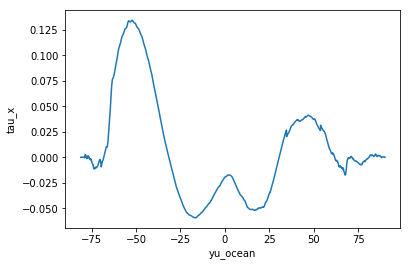

In [16]:
%%time
dsx.tau_x.mean('time').mean('xu_ocean').plot()

In [17]:
%%time
datasets = [xr.open_dataset(fn,
                           ).tau_x for fn in FileList[-4:]]

CPU times: user 96.9 ms, sys: 11.4 ms, total: 108 ms
Wall time: 106 ms


In [18]:
%%time
dsx = xr.concat(datasets, dim='time', coords='all')

CPU times: user 8.13 s, sys: 1.65 s, total: 9.79 s
Wall time: 9.77 s


In [19]:
dsx

<xarray.DataArray 'tau_x' (time: 12, yu_ocean: 2700, xu_ocean: 3600)>
array([[[ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[  0.,   0., ...,  nan,  nan],
        [  0.,   0., ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ..., 
       [[  0.,   0., ...,  nan,  nan],
        [  0.,   0., ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[  0.,   0., ...,  nan,  nan],
        [  0.,   0., ...,  nan,  nan],
        ..., 
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]])
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 -279.5 -279.4 ...
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 -80.92 -80.88 ...
  * time      (time) object   45-01-16 12:00:00   45-02-15 

In [20]:
FileList[0]

'/g/data3/hh5/tmp/cosima/mom01v5/KDS75_wind/output150/ocean_month.nc'

In [46]:
%%time
datasets = [xr.open_dataset(fn,
                         chunks={'time':1,
                                 'yu_ocean':675, 'xu_ocean':900
                                }).tau_x for fn in FileList[-20:]]

CPU times: user 603 ms, sys: 55.2 ms, total: 658 ms
Wall time: 672 ms


In [47]:
%%time

dsx = xr.concat(datasets, dim='time', coords='all')

CPU times: user 55.7 ms, sys: 1.59 ms, total: 57.3 ms
Wall time: 55.4 ms


In [43]:
dsx

<xarray.DataArray 'tau_x' (time: 12, yu_ocean: 2700, xu_ocean: 3600)>
dask.array<concatenate, shape=(12, 2700, 3600), dtype=float64, chunksize=(1, 675, 900)>
Coordinates:
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 -279.5 -279.4 ...
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 -80.92 -80.88 ...
  * time      (time) object   45-01-16 12:00:00   45-02-15 00:00:00 ...
    geolon_c  (time, yu_ocean, xu_ocean) float64 nan nan nan nan nan nan nan ...
    geolat_c  (time, yu_ocean, xu_ocean) float64 nan nan nan nan nan nan nan ...
Attributes:
    long_name:      i-directed wind stress forcing u-velocity
    units:          N/m^2
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  surface_downward_x_stress

In [31]:
dsx.data.dask

In [32]:
len(dsx.data.dask)

14

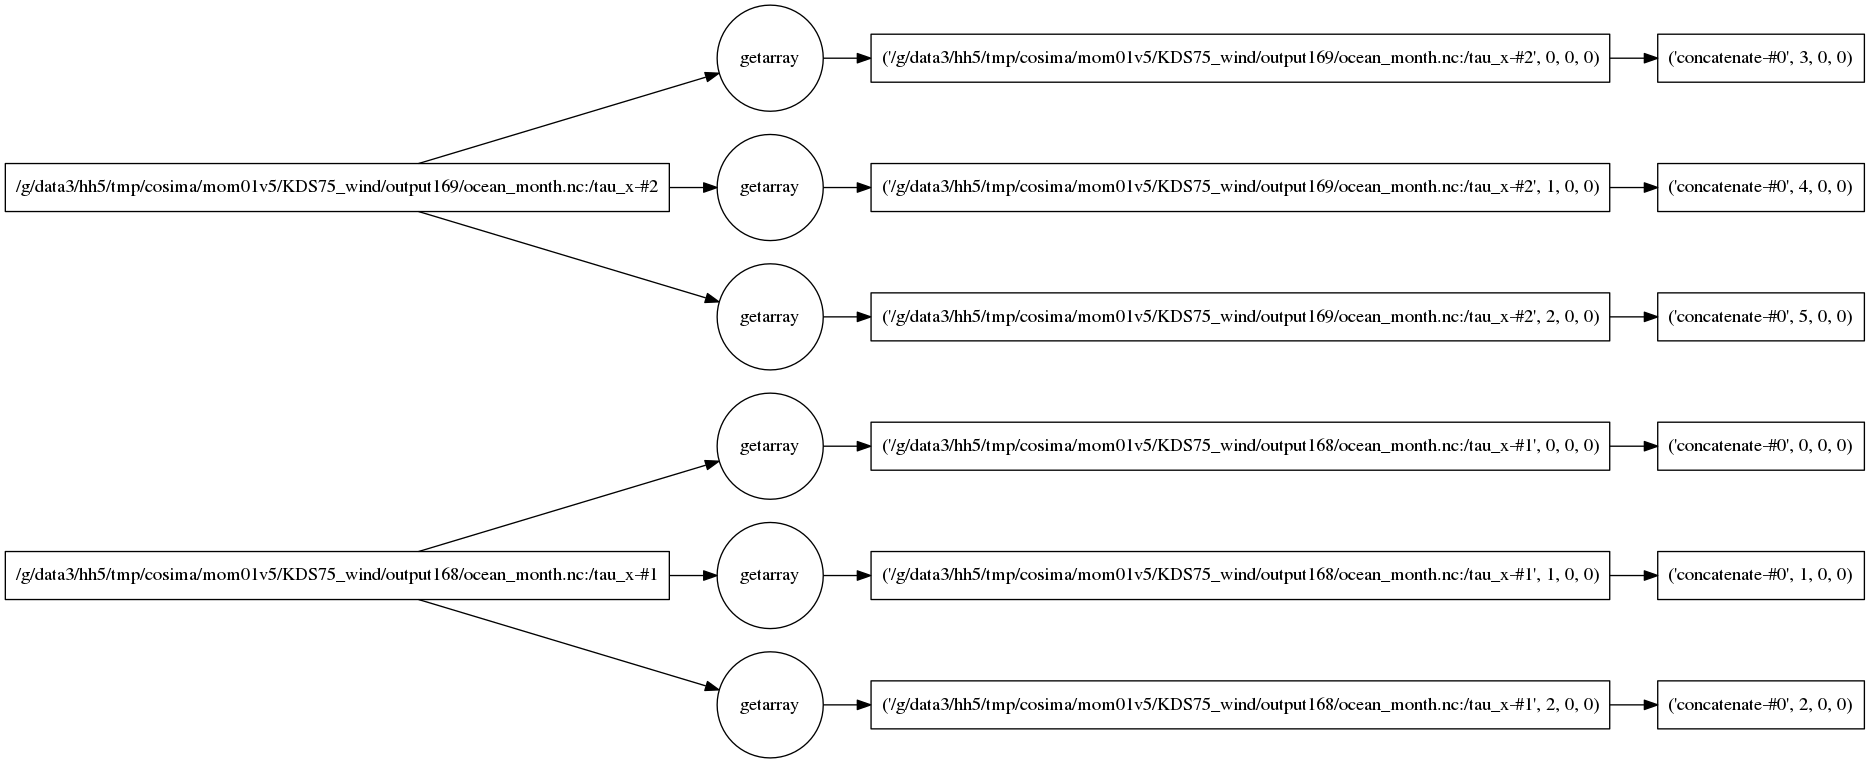

In [33]:
dot_graph(dsx.data.dask, rankdir='LR')

In [48]:
%%time
dsx = dsx.mean('time').mean('xu_ocean')

CPU times: user 16.3 ms, sys: 295 µs, total: 16.6 ms
Wall time: 16.3 ms


In [50]:
len(dsx.data.dask)

3240

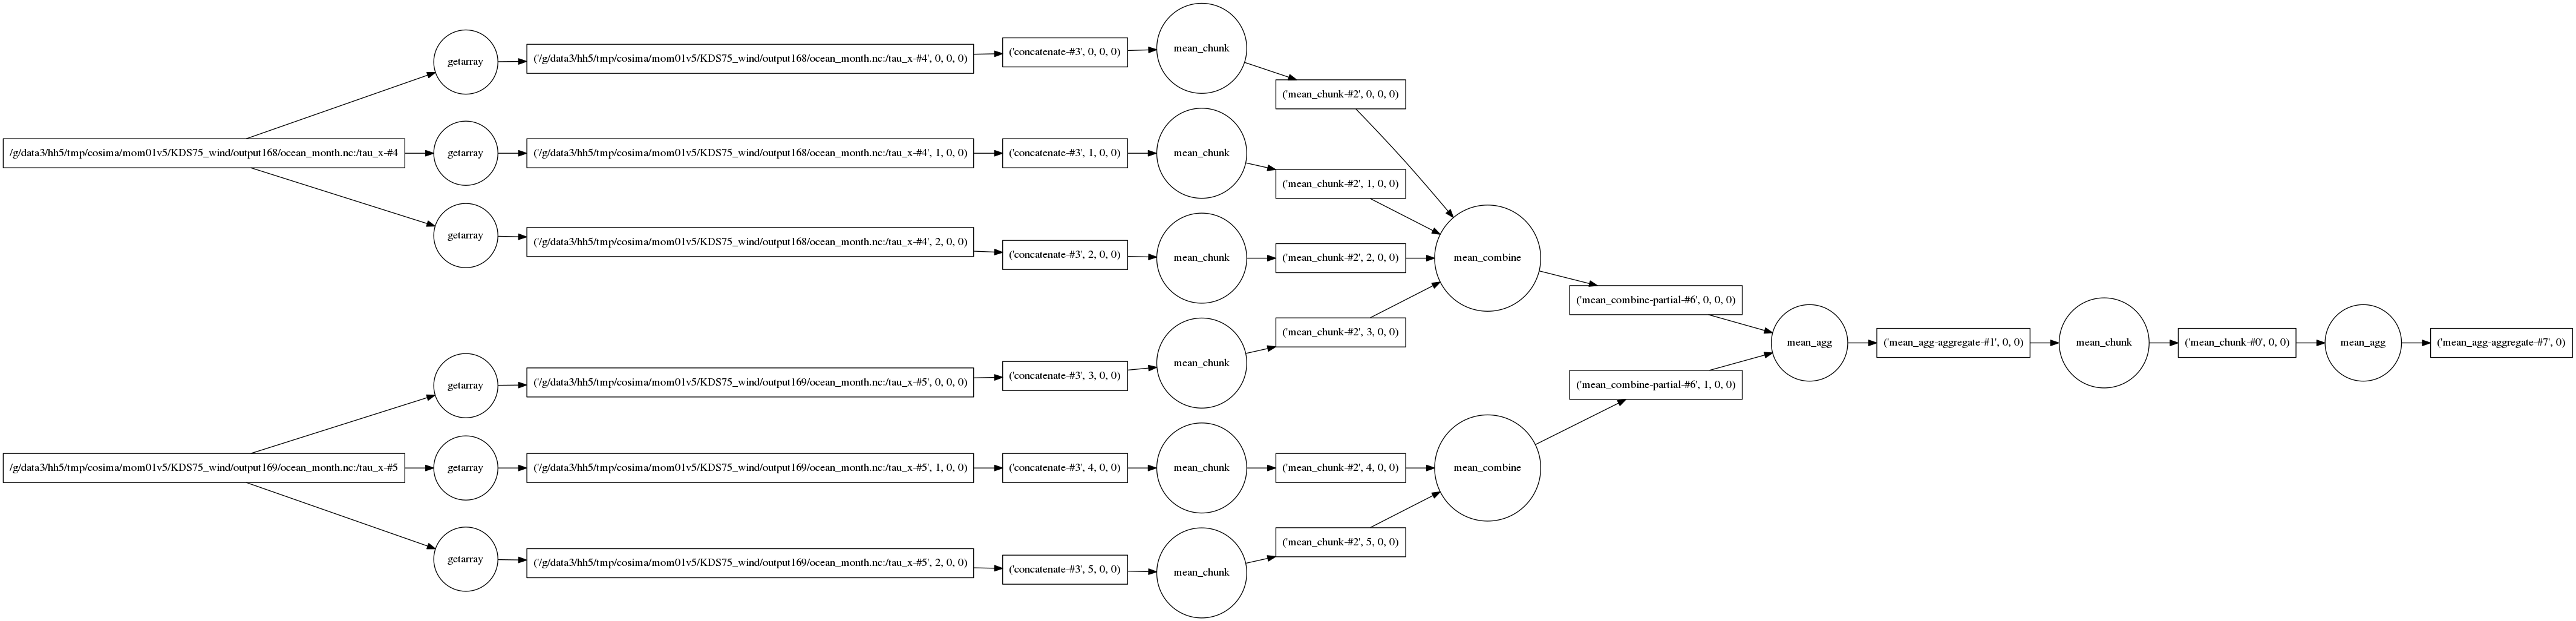

In [39]:
dot_graph(dsx.data.dask, rankdir='LR')

In [51]:
%%time
dsx.load()

CPU times: user 356 ms, sys: 21.8 ms, total: 378 ms
Wall time: 5.15 s


<xarray.DataArray 'tau_x' (yu_ocean: 2700)>
array([  0.000000e+00,   0.000000e+00,   0.000000e+00, ...,   1.166672e-04,
         8.436115e-05,   0.000000e+00])
Coordinates:
  * yu_ocean  (yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 -80.92 -80.88 ...

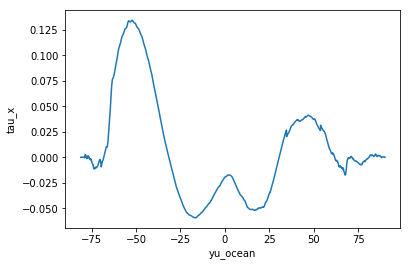

In [26]:
dsx.plot()

In [40]:
from dask.distributed import Client
client = Client(scheduler_file='/home/156/jm0634/dask_scheduler_file')
client

<Client: scheduler='tcp://10.9.2.19:8786' processes=32 cores=32>

In [52]:
%%time
tau_x = {}
for e in tqdm_notebook(expts):
    print(e)
    ExpDir = os.path.join(DataDir, e)
    FileList = sorted(glob(os.path.join(ExpDir, 'output*/ocean_month.nc')))
    
    datasets = [xr.open_dataset(fn, 
                    chunks={'time':1, 'yu_ocean':675, 'xu_ocean':900},
                    ).tau_x for fn in FileList[-20:]]

    dsx = xr.concat(datasets, dim='time', coords='all')
    avg_tau_x = dsx.mean('time').mean('xu_ocean')
    
    avg_tau_x.load()
    tau_x[e] = avg_tau_x

GFDL50
KDS75
KDS75_UP
KDS75_PI
KDS75_wind

CPU times: user 5.65 s, sys: 345 ms, total: 6 s
Wall time: 30.4 s


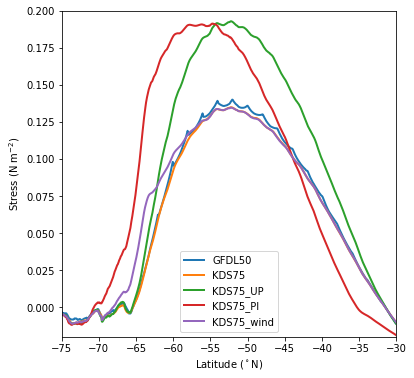

In [53]:
plt.figure(figsize=(6,6))

for e in expts:
    tau_x[e].plot(linewidth=2,label=e)
    
plt.xlim([-75,-30])
plt.ylim([-0.02,0.2])
plt.xlabel('Latitude ($^\circ$N)')
plt.ylabel('Stress (N m$^{-2}$)')
plt.legend(loc=8,fontsize=10)

# Overturning Circulation
Next, let's look at overturning circulation in density space using ty_trans_rho. We will zonally average this diagnostic, without accounting for the tripolar grid, so ignore the Arctic.

In [54]:
expt = 'KDS75'
ExpDir = os.path.join(DataDir, expt)

FileList = sorted(glob(os.path.join(ExpDir, 'output*/ocean.nc')))

In [55]:
datasets = [xr.open_dataset(fn,
                         chunks={'time':1, 
                                 #'potrho':8, 
                                 'grid_yu_ocean':270, 
                                 'grid_xt_ocean': 360})
            for fn in FileList[-20:]]
psi = [ds.ty_trans_rho.sum('grid_xt_ocean')\
         .cumsum('potrho') for ds in datasets]
psi = xr.concat(psi, dim='time')
psi_avg = psi.mean('time')

In [56]:
psi_avg

<xarray.DataArray 'ty_trans_rho' (potrho: 80, grid_yu_ocean: 2700)>
dask.array<mean_agg-aggregate, shape=(80, 2700), dtype=float64, chunksize=(80, 270)>
Coordinates:
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 -80.92 ...
  * potrho         (potrho) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03 ...

In [57]:
%%time
psi_avg.load()

CPU times: user 853 ms, sys: 32.4 ms, total: 886 ms
Wall time: 30.2 s


<xarray.DataArray 'ty_trans_rho' (potrho: 80, grid_yu_ocean: 2700)>
array([[  0.000000e+00,   0.000000e+00,   0.000000e+00, ...,  -2.435919e-04,
         -3.993770e-04,  -4.935188e-04],
       [  0.000000e+00,   0.000000e+00,   0.000000e+00, ...,  -3.011641e-04,
         -4.777789e-04,  -5.147977e-04],
       [  0.000000e+00,   0.000000e+00,   0.000000e+00, ...,  -2.940894e-04,
         -4.492633e-04,  -4.840355e-04],
       ..., 
       [  0.000000e+00,   0.000000e+00,   0.000000e+00, ...,   4.900302e-04,
          2.864067e-04,   4.623740e-05],
       [  0.000000e+00,   0.000000e+00,   0.000000e+00, ...,   4.900302e-04,
          2.864067e-04,   4.623740e-05],
       [  0.000000e+00,   0.000000e+00,   0.000000e+00, ...,   4.900302e-04,
          2.864067e-04,   4.623740e-05]])
Coordinates:
  * grid_yu_ocean  (grid_yu_ocean) float64 -81.09 -81.05 -81.0 -80.96 -80.92 ...
  * potrho         (potrho) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03 ...

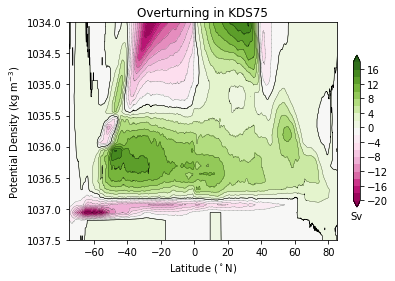

In [58]:
def plot_psi(psi_avg, expt, clev=np.arange(-20,20,2)):

    plt.contourf(psi_avg.grid_yu_ocean, 
                 psi_avg.potrho, 
                 psi_avg, 
                 cmap=plt.cm.PiYG,levels=clev,extend='both')
    cb=plt.colorbar(orientation='vertical', shrink = 0.7)
    cb.ax.set_xlabel('Sv')
    plt.contour(psi_avg.grid_yu_ocean, 
                psi_avg.potrho, 
                psi_avg, levels=clev, colors='k', linewidths=0.25)
    plt.contour(psi_avg.grid_yu_ocean,
                psi_avg.potrho, psi_avg,
                levels=[0.0,], colors='k', linewidths=0.5)
    plt.gca().invert_yaxis()
    
    plt.ylim((1037.5,1034))
    plt.ylabel('Potential Density (kg m$^{-3}$)')
    plt.xlabel('Latitude ($^\circ$N)')
    plt.xlim([-75,85])
    plt.title('Overturning in %s' % expt)

plot_psi(psi_avg, expt)

# Eddy Kinetic Energy
Plan here is to add:
* maps of vertically summed EKE (is this even feasible for this dataset)
* timeseries of globally averaged EKE

We can only do this for portions of simulations which have 5-day average velocities saved, which means directories with `ocean__*.nc` files.


In [59]:
# get a list of simulations with 5-day average velocities (ocean__*.nc files)
expt = 'KDS75'
ExpDir = os.path.join(DataDir, expt)
FileList = sorted(glob(os.path.join(ExpDir, 'output*/ocean__*.nc')))

In [36]:
print(len(FileList))

720


In [62]:
def calc_eke(FileList, box_index, cache=False):
    yi, xi = box_index
    
    eke_filename = 'eke_{}_{}.nc'.format(*box_index)
    if cache and os.path.exists(eke_filename):
        dsx = xr.open_dataset(eke_filename, decode_times=False)
        return dsx
    
    box = {'yu_ocean': slice(300*yi, 300*(yi+1)),
           'xu_ocean': slice(400*xi, 400*(xi+1))}
       
    datasets = []
    for fn in FileList:
        ds = xr.open_dataset(fn, 
                chunks={'time':1, 'st_ocean':7, 
                        'yu_ocean':300, 'xu_ocean': 400}, 
                            decode_times=False)\
               .isel(**box)
        datasets.append(ds)

    u = xr.concat([ds.u for ds in datasets], dim='time', coords='all')
    u_avg = u.mean('time')
    v = xr.concat([ds.v for ds in datasets], dim='time', coords='all')
    v_avg = v.mean('time')

    MKE = 0.5 * (u_avg**2 + v_avg**2)
    MKE = MKE.sum(dim='st_ocean')
    MKE = MKE.to_dataset(name='MKE')
    
    u_ = xr.concat([ds.u - u_avg for ds in datasets], 
                   dim='time', coords='all')
    v_ = xr.concat([ds.v - v_avg for ds in datasets], 
                   dim='time', coords='all')

    EKE = 0.5 * (u_**2 + v_**2)

    EKE = EKE.sum(dim='st_ocean')
    EKE = EKE.to_dataset(name='EKE')

    dsx = xr.merge([MKE, EKE])
    
    if cache:
        dsx.load()
        
        # cache results
        dsx.to_netcdf(eke_filename)
        
    return dsx
    

In [61]:
from itertools import product

# ceil(x/y) = (x+y+1)//y
yi = range(2700//(300)) 
xi = range(3600//(400))

box_indexes = list(product(*[yi, xi]))

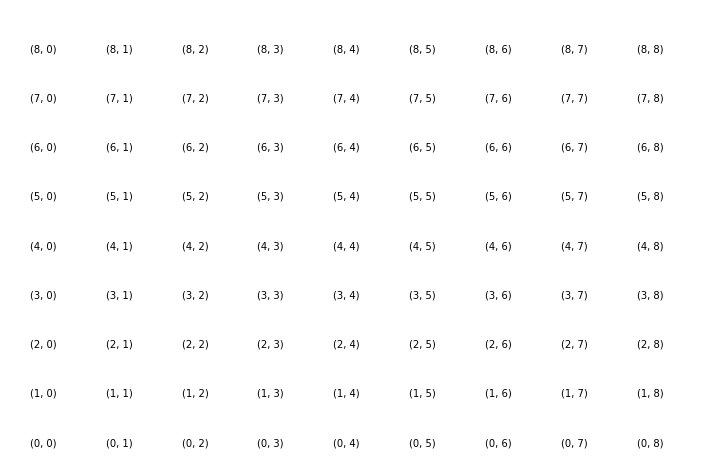

In [40]:
plt.figure(figsize=(12,8))
for box_index in tqdm_notebook(box_indexes):

    plt.subplot(9, 9, box_index[1] + 9*(8-box_index[0])+1 )
    plt.axis('off')

    plt.text(0, 0, box_index)

In [63]:
%%time
dsx = calc_eke(FileList[-72:], (4,3))

CPU times: user 4.59 s, sys: 264 ms, total: 4.85 s
Wall time: 7.36 s


In [64]:
dsx.MKE

<xarray.DataArray 'MKE' (yu_ocean: 300, xu_ocean: 400)>
dask.array<sum-aggregate, shape=(300, 400), dtype=float64, chunksize=(300, 400)>
Coordinates:
  * xu_ocean  (xu_ocean) float64 -159.9 -159.8 -159.7 -159.6 -159.5 -159.4 ...
  * yu_ocean  (yu_ocean) float64 -4.396 -4.296 -4.196 -4.097 -3.997 -3.897 ...

In [65]:
%%time
dsx.load()

CPU times: user 1.96 s, sys: 432 ms, total: 2.39 s
Wall time: 19.2 s


<xarray.Dataset>
Dimensions:   (time: 72, xu_ocean: 400, yu_ocean: 300)
Coordinates:
  * xu_ocean  (xu_ocean) float64 -159.9 -159.8 -159.7 -159.6 -159.5 -159.4 ...
  * yu_ocean  (yu_ocean) float64 -4.396 -4.296 -4.196 -4.097 -3.997 -3.897 ...
  * time      (time) float64 3.577e+04 3.578e+04 3.578e+04 3.579e+04 ...
    geolon_c  (time, yu_ocean, xu_ocean) float64 -159.9 -159.8 -159.7 -159.6 ...
    geolat_c  (time, yu_ocean, xu_ocean) float64 -4.396 -4.396 -4.396 -4.396 ...
Data variables:
    MKE       (yu_ocean, xu_ocean) float64 0.6247 0.6276 0.6352 0.6455 ...
    EKE       (time, yu_ocean, xu_ocean) float64 0.6469 0.7454 0.7694 0.6222 ...

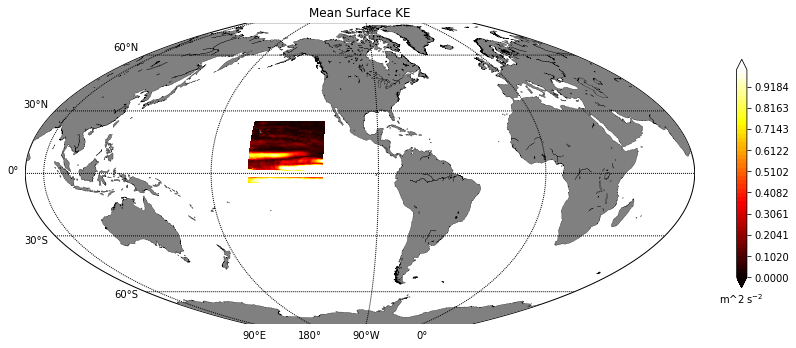

In [66]:
# Plot in basemap 

plt.figure(figsize=(15,6))
lev = np.linspace(0,1.0,50)
map = Basemap(projection='mbtfpq',lon_0 = -100,resolution='l')
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
map.drawparallels(np.arange(-60.,61.,30.),
                  labels=[True,False,False,False])
map.drawmeridians(np.arange(-180.,181.,90.),
                  labels=[False,False,False,True])

x=dsx.xu_ocean[:]
y=dsx.yu_ocean[:]
lon, lat = np.meshgrid(x, y)

X, Y = map(lon,lat) 

map.contourf(X, Y, dsx.MKE,
             cmap=plt.cm.hot,
             levels=lev,extend='both')

cb = plt.colorbar(orientation='vertical',shrink = 0.7)

cb.ax.set_xlabel('m^2 s$^{-2}$')
plt.title('Mean Surface KE')

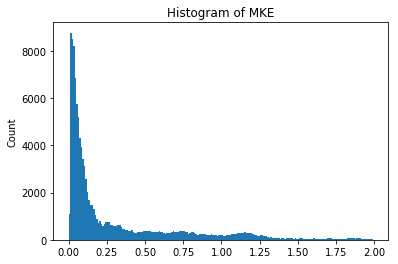

In [53]:
hist = dsx.MKE.plot.hist(bins=np.arange(0,2,0.01))

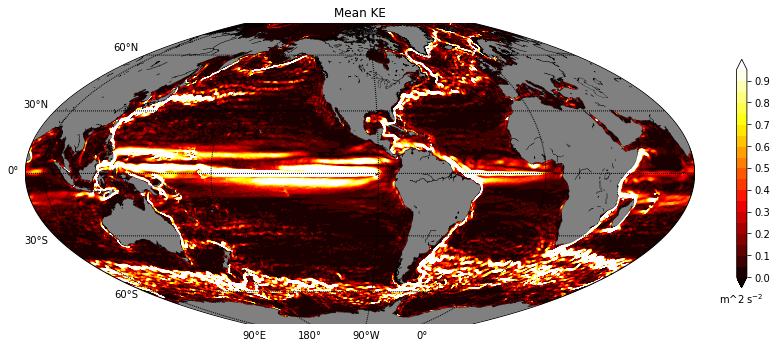

In [67]:
# Plot in basemap 

plt.figure(figsize=(15,6))
lev = np.arange(0, 1.0, 0.05)
map = Basemap(projection='mbtfpq',
              lon_0 = -100, resolution='l')
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
map.drawparallels(np.arange(-60.,61.,30.),
                  labels=[True,False,False,False])
map.drawmeridians(np.arange(-180.,181.,90.),
                  labels=[False,False,False,True])

for box_index in tqdm_notebook(box_indexes):
    #print(box_index)
    dsx = calc_eke(FileList[-72:], box_index, cache=True)
    
    x=dsx.xu_ocean[:]
    y=dsx.yu_ocean[:]
    lon, lat = np.meshgrid(x, y)
    
    X, Y = map(lon,lat) 
    
    map.contourf(X, Y, dsx.MKE,
                 cmap=plt.cm.hot,
                 levels=lev,extend='both')

cb = plt.colorbar(orientation='vertical',shrink = 0.7)

cb.ax.set_xlabel('m^2 s$^{-2}$')
plt.title('Mean KE')

In [68]:
datasets = []
for box_index in tqdm_notebook(box_indexes):
    dsx = calc_eke(FileList[-72:], box_index, cache=True)
    dsx = dsx.EKE.mean('xu_ocean').mean('yu_ocean')
    datasets.append(dsx)

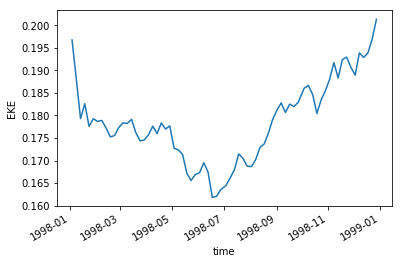

In [69]:
mean_EKE = xr.concat(datasets, dim='boxid').mean('boxid')

dsx = mean_EKE.to_dataset(name='EKE')
dsx.time.attrs["units"] = 'days since 1900-01-01'
dsx = xr.decode_cf(dsx, decode_times=True)

dsx.EKE.plot()